# Name: Ronit Kumar Kataria
# Email : rk06451@st.habib.edu.pk
# Homework Name: Homework Assignment 5: SQL

In [30]:
import pandas as pd
import numpy as np
import psycopg2
import pandas.io.sql as psql


In [31]:
# Everytime you have to connect to the database, you need to create a connection object
conn = psycopg2.connect(
    host="localhost",
    database="postgres",
    user = "postgres",
    password = "576421",
)

The Next Step is to fetch the data from the database so we can work with it

In [32]:
emp1_data = psql.read_sql("SELECT * FROM employeeattrition1", conn)
emp2_data = psql.read_sql("SELECT * FROM employeeattrition2", conn)

c:\Users\Ronit Kataria\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
c:\Users\Ronit Kataria\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [33]:
emp1_data.columns

Index(['employeenumber', 'age', 'businesstravel', 'dailyrate', 'department',
       'distancefromhome', 'education', 'educationfield',
       'environmentsatisfaction', 'gender', 'hourlyrate', 'jobinvolvement',
       'joblevel', 'jobrole', 'jobsatisfaction', 'maritalstatus',
       'monthlyincome', 'monthlyrate', 'numcompaniesworked',
       'percentsalaryhike', 'performancerating', 'relationshipsatisfaction',
       'standardhours', 'stockoptionlevel', 'totalworkingyears',
       'trainingtimeslastyear', 'worklifebalance', 'yearsatcompany',
       'yearsincurrentrole', 'yearssincelastpromotion',
       'yearswithcurrmanager'],
      dtype='object')

For this we have to show three Intresting Analysis 

<h>UNIVARIATE ANALYSIS</h>
<br>
The very first analysis is done to check number of Employees working in each department. 

<AxesSubplot:>

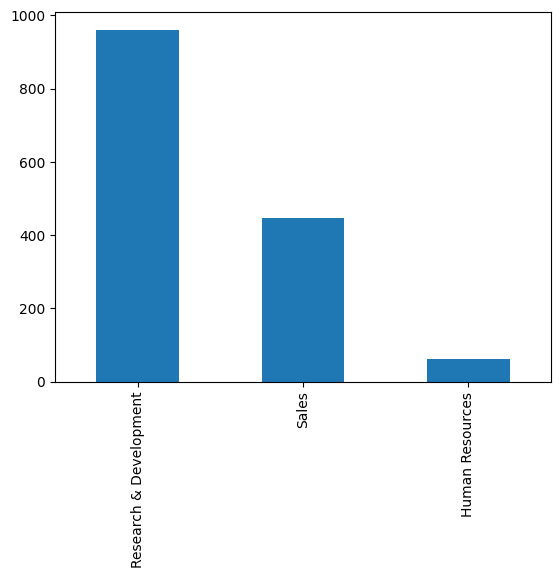

In [34]:
emp1_data['department'].value_counts().plot(kind='bar')


<h>Analysis:</h>
The very first analysis, I did was Uni-Variate to check the count of Employee in each department. The motivation of this came from an idea to check the relativity of company's vision. Beased on my results, most of employees work in Research and Development catergory which means this company's basic propaganda in R&D. Moreover, there are also some people present in the Sales Category so there might be a product based category as well. 

<h>BIVARIATE ANALYSIS</h>
<br>
The second analysis is done to check are the amount of salaries dependent on gender? 

<AxesSubplot:xlabel='monthlyincome', ylabel='Density'>

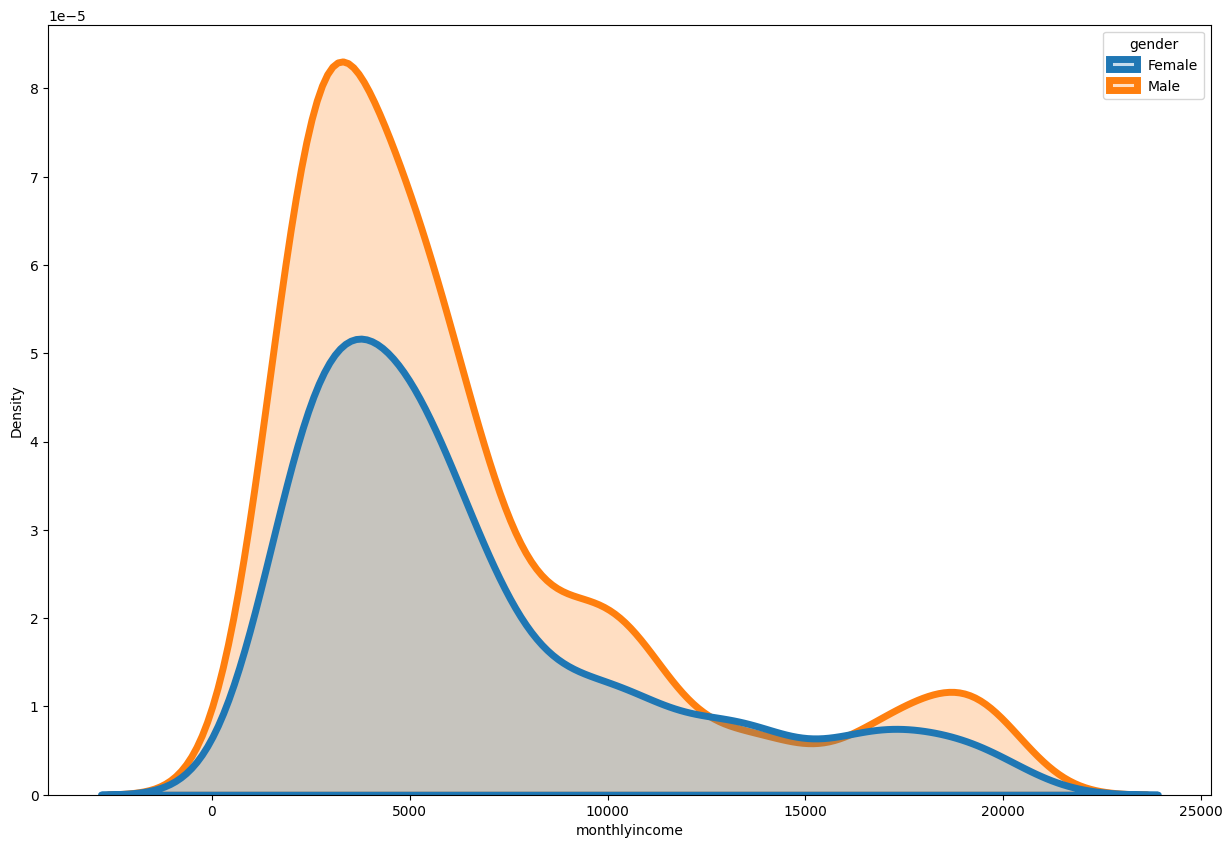

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
sns.kdeplot(data=emp1_data, x='monthlyincome',
            hue='gender',  fill=True, linewidth=5)


<h>Analysis:</h>
The motivation for this came from an idea to check whether the gender has any effect on annual income of any employee. With regards to my Analysis, it came out that there is not a single effect gender puts on the annual income of any Employee. As this can be seen that the highest Salary is taken by a Female Employee which might have higher experince as well. 

In [51]:
emp1_data['yearsatcompany'] = emp1_data['yearsatcompany'].astype('int64')
emp1_data['numcompaniesworked'] = emp1_data['numcompaniesworked'].astype(
    'int64')

emp1_data['performancerating'] = emp1_data['performancerating'].astype('int64')
emp1_data['percentsalaryhike'] = emp1_data['percentsalaryhike'].astype('int64')

corr = emp1_data.groupby(by='department').agg(
    'mean')[['hourlyrate', 'joblevel', 'numcompaniesworked', 'yearsatcompany', 'percentsalaryhike']].corr()
corr.style.background_gradient(cmap='coolwarm')

,hourlyrate,joblevel,numcompaniesworked,yearsatcompany,percentsalaryhike
hourlyrate,1.000000,-0.011262,-0.691383,-0.696672,0.999714
joblevel,-0.011262,1.000000,-0.714657,0.725190,-0.035175
numcompaniesworked,-0.691383,-0.714657,1.000000,-0.036639,-0.673905
yearsatcompany,-0.696672,0.725190,-0.036639,1.000000,-0.713631
percentsalaryhike,0.999714,-0.035175,-0.673905,-0.713631,1.000000


<h>Analysis:</h>
This is the Co-Relation plot to analyze the relationship between different column with each other. For example if there is a positive Co-relation so if one goes up, the other one will also go up, whereas negative co-relation states that if one goes down the other will go up. 
<br>

Here we can see that JobLevel and Number of years at company has positive Co-Relation which means that Experince of a Person at Company will definelty boost up his JobLevel. 

The second intresting Corelation is between year at company with numcompanies involved which is almost 0. Thus we cant directly tell that there is a strong relation between them. 

There is a slight disturbancy is analysis which states that hourly rate is negatively corelated to years at company however if a person has more experinced that he should have a higher payrate. 
